In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

5.319855296562494 67.84752344267301
-16.591727873751864 -20.500764958992278
73.18677682925195 -176.48818999252154
-56.43888946304401 145.59852927431746
-44.45144102634736 -118.81781484381983
-51.57526287931161 -37.04357048165383
25.726994131940017 -131.6865455057406
-84.99889025991688 86.44719096701522
79.81380695593944 128.14051757279418
-9.220504190040131 43.349694991614626
-24.15232294592002 -112.78278271723576
22.299616822229837 -22.901185523070325
48.52555758053512 69.3889988513481
-80.48671948748262 158.15328430602568
17.125611124836354 60.73851706792061
20.43335791421937 59.67163108297862
37.27298424712835 -17.84230383651058
-67.19509716430598 64.45263945951646
59.52231057972557 -113.41167469199705
66.56345411119364 133.08013555753894
-71.17488348524869 -162.3984742901241
23.746701814104142 -161.91027022175268
-66.55244784527353 11.295890839087718
-25.805611194535516 147.31940154965213
-89.45761586361284 -123.88311043530896
-62.24248836066111 -82.43055501123642
-30.7762860969788

-49.60269298118581 82.18387480713818
56.467457403148046 -19.86877585854438
-28.9536154054066 29.823078523434248
-36.54583452794793 65.85143719546701
-89.94035691018226 21.1915015110786
-64.58482508248437 -124.45664730793008
-7.780474102992969 -45.244336578687324
-88.819630231999 -113.30268894520239
-13.130445050925744 165.99029838954402
-2.307572120536989 118.6668659681639
76.41313955069532 154.04173513820285
86.06432874009255 -61.11861047439615
31.733503053079247 -123.39009033840588
-32.13116079577552 156.2972054447547
75.15924725832758 -164.47745266716973
89.20436350807134 -38.058703227457045
-38.25953901316183 36.81168523028623
62.60151461525953 -41.545763840782655
67.04357630299936 -95.29834100737392
85.5049188427117 80.5796299735074
-19.158712812384167 -157.1574956737913
36.985651682744816 121.37722789275261
25.171104079074794 105.55702514853476
53.81345178281387 -81.50691448033074
21.27449230982954 20.966581484988097
49.25260169987649 121.93606269770203
-22.531120254266426 -29.85

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ugoofaaru
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | mitsamiouli
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | zhezkazgan
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | camacha
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | hay river
Processing Record 18 of Set 1 | verkhoyansk
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | roma

Processing Record 39 of Set 4 | innisfail
Processing Record 40 of Set 4 | disna
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | sao jose de ribamar
Processing Record 43 of Set 4 | tangzhai
Processing Record 44 of Set 4 | visnes
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | nyagan
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | atambua
Processing Record 50 of Set 4 | vyazemskiy
Processing Record 1 of Set 5 | tidore
City not found. Skipping...
Processing Record 2 of Set 5 | fairbanks
Processing Record 3 of Set 5 | burnie
Processing Record 4 of Set 5 | beloha
Processing Record 5 of Set 5 | salekhard
Processing Record 6 of Set 5 | rolim de moura
City not found. Skipping...
Processing Record 7 of Set 5 | sarakhs
Processing Record 8 of Set 5 | kloulklubed
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Set 5 | thompson
Processi

Processing Record 26 of Set 8 | kamaishi
Processing Record 27 of Set 8 | kouango
Processing Record 28 of Set 8 | tokzar
City not found. Skipping...
Processing Record 29 of Set 8 | kavaratti
Processing Record 30 of Set 8 | tommot
Processing Record 31 of Set 8 | grand gaube
Processing Record 32 of Set 8 | hoctun
Processing Record 33 of Set 8 | surt
Processing Record 34 of Set 8 | kropotkin
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | japura
Processing Record 37 of Set 8 | tucuman
Processing Record 38 of Set 8 | maturin
Processing Record 39 of Set 8 | gaoua
Processing Record 40 of Set 8 | pemba
Processing Record 41 of Set 8 | saint-augustin
Processing Record 42 of Set 8 | cidreira
Processing Record 43 of Set 8 | puerto del rosario
Processing Record 44 of Set 8 | flin flon
Processing Record 45 of Set 8 | colborne
Processing Record 46 of Set 8 | cotnari
Processing Record 47 of Set 8 | boyolangu
Processing Record 48 of Set 8 | port-gentil
Processing Record 49 of

Processing Record 16 of Set 12 | hohhot
Processing Record 17 of Set 12 | safwah
City not found. Skipping...
Processing Record 18 of Set 12 | svetlyy
Processing Record 19 of Set 12 | samusu
City not found. Skipping...
Processing Record 20 of Set 12 | princeton
Processing Record 21 of Set 12 | umm lajj
Processing Record 22 of Set 12 | semirom
Processing Record 23 of Set 12 | camopi
Processing Record 24 of Set 12 | kwinana
Processing Record 25 of Set 12 | nador
Processing Record 26 of Set 12 | port shepstone
Processing Record 27 of Set 12 | cabatuan
Processing Record 28 of Set 12 | mooi river
City not found. Skipping...
Processing Record 29 of Set 12 | sao raimundo das mangabeiras
Processing Record 30 of Set 12 | sola
Processing Record 31 of Set 12 | port macquarie
Processing Record 32 of Set 12 | ninghai
Processing Record 33 of Set 12 | xingyi
Processing Record 34 of Set 12 | yakeshi
Processing Record 35 of Set 12 | talara
Processing Record 36 of Set 12 | dubrovnik
Processing Record 37 o

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ugoofaaru,5.6667,73.0000,81.07,77,93,21.39,MV,2022-08-02 20:55:16
1,Georgetown,5.4112,100.3354,78.73,93,40,7.00,MY,2022-08-02 20:52:34
2,Hobart,-42.8794,147.3294,52.27,74,75,13.80,AU,2022-08-02 20:55:17
3,Rikitea,-23.1203,-134.9692,72.14,77,83,21.72,PF,2022-08-02 20:55:17
4,Chuy,-33.6971,-53.4616,54.57,96,25,4.79,UY,2022-08-02 20:55:17
5,Lompoc,34.6391,-120.4579,94.01,67,0,12.66,US,2022-08-02 20:55:18
6,Busselton,-33.6500,115.3333,55.62,53,96,29.24,AU,2022-08-02 20:55:18
7,Tiksi,71.6872,128.8694,40.12,82,100,3.22,RU,2022-08-02 20:55:18
8,Mitsamiouli,-11.3847,43.2844,75.87,73,8,4.65,KM,2022-08-02 20:55:19
9,Ponta Do Sol,32.6667,-17.1000,72.72,81,6,6.64,PT,2022-08-02 20:55:19


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ugoofaaru,MV,2022-08-02 20:55:16,5.6667,73.0000,81.07,77,93,21.39
1,Georgetown,MY,2022-08-02 20:52:34,5.4112,100.3354,78.73,93,40,7.00
2,Hobart,AU,2022-08-02 20:55:17,-42.8794,147.3294,52.27,74,75,13.80
3,Rikitea,PF,2022-08-02 20:55:17,-23.1203,-134.9692,72.14,77,83,21.72
4,Chuy,UY,2022-08-02 20:55:17,-33.6971,-53.4616,54.57,96,25,4.79
...,...,...,...,...,...,...,...,...,...
552,Abha,SA,2022-08-02 21:10:07,18.2164,42.5053,61.05,94,20,0.00
553,Nogales,MX,2022-08-02 21:10:07,31.3086,-110.9422,85.57,51,0,6.91
554,Clovis,US,2022-08-02 21:10:08,36.8252,-119.7029,100.47,32,75,6.91
555,Cairns,AU,2022-08-02 21:10:08,-16.9167,145.7667,69.75,83,10,10.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

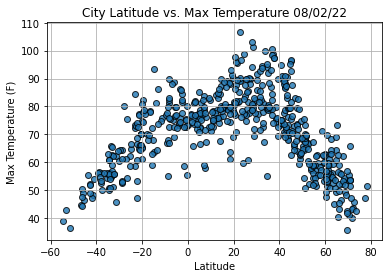

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


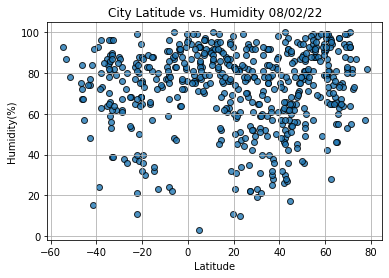

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

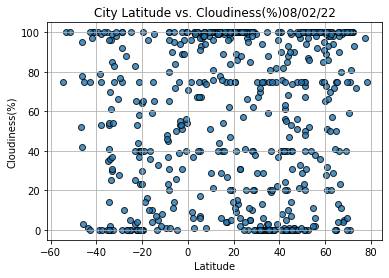

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

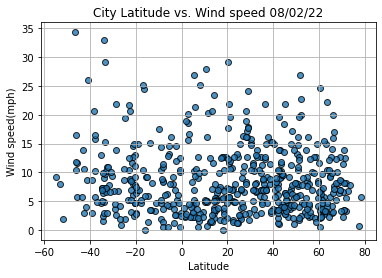

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Camacha
Country                        PT
Date          2022-08-02 20:55:20
Lat                       33.0833
Lng                      -16.3333
Max Temp                    67.42
Humidity                       78
Cloudiness                     75
Wind Speed                  12.66
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

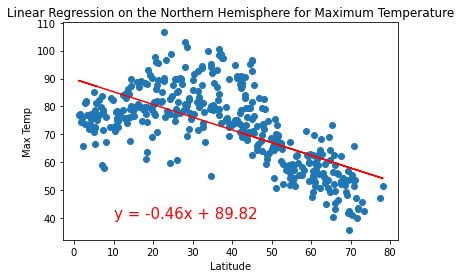

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

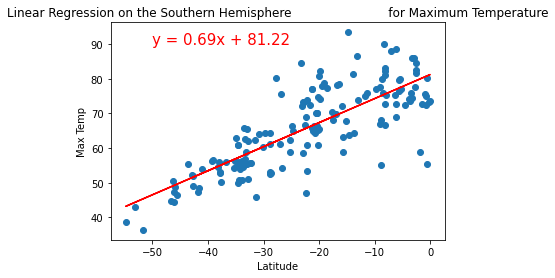

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))